# Script 8: Suavizando os Contornos
Neste script vemos como suavizar os contornos dos plots utilizando o comando "zoom" a biblioteca "scipy". Basicamente aumentamos o tamanho da array "x" vezes, realizando uma interpolação.

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 8: Smoothing the Contours  
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-90.0, -60.00, -10.00, 15.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

print("\nArray dimensions before smoothing:")
print(tmtmp.shape)

# Smooth the contours
import scipy.ndimage
tmtmp = scipy.ndimage.zoom(tmtmp, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

print("Array dimensions after smoothing:")
print(tmtmp.shape)
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,18))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_8.png')

# Show the image
plt.show()

ModuleNotFoundError: No module named 'pygrib'

In [ ]:
background = cimgt.GoogleTiles(style='satellite')
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=background.crs)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)
shapefile1 = list(shpreader.Reader('AMERICA_SUL.shp').geometries())
ax.add_geometries(shapefile1, ccrs.PlateCarree(),edgecolors='b')

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()

In [2]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
print(gpd.__version__)   ## 0.5

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
background = cimgt.GoogleTiles(style='satellite')
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=background.crs)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# extensão da imagem longitude,longitude,latitude,latitude
ax.set_extent([-80, -30, -35, 10])

# adiciona o background como uma imagem, com o 6° nível de zoom no resultado do mapa
ax.add_image(background,6)

# plota
plt.show()

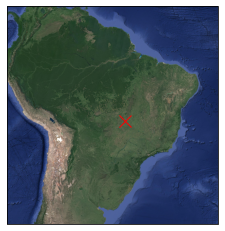

In [4]:
ax = plt.axes(projection=background.crs)
ax.set_extent([-80, -30, -35, 10])
ax.add_image(background,6)

# adicionando um marker sobre o plot na longitude -52 e lat -16
ax.plot(-52,-16,
        marker='x',
        color='red',
        markersize=12,
        transform=ccrs.Geodetic())
        
plt.show()
             

In [1]:
gpd.plot(column='V',cmap='RdYlGn',ax=ax,transform=ccrs.Geodetic())

NameError: name 'gpd' is not defined

In [7]:
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature

In [8]:
background = cimgt.GoogleTiles(style='satellite')
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))


# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]


# montando nosso eixo
ax = plt.axes(projection=background.crs)
ax.set_extent([-80, -30, -35, 10])
ax.add_image(background,6);

# carrega o shape dos estados
states = NaturalEarthFeature(category='cultural', scale='50m',facecolor='none',name='admin_1_states_provinces_shp',edgecolor='#fff52e')

# plota o shape dos limites dos países
ax.add_feature(cfeature.BORDERS,linewidth=.5, edgecolor='#fff52e')

# plota o shape dos estados
ax.add_feature(states, linewidth=.125, edgecolor='#fff52e')

# plota a linha costeira
ax.coastlines('50m', linewidth=.5, color='#fff52e')

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()


NameError: name 'cimgt' is not defined

In [1]:
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')


import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    if name in states:
        facecolor = 'DarkOrange'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')
    
    
# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()


ModuleNotFoundError: No module named 'cartopy'

In [38]:
# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

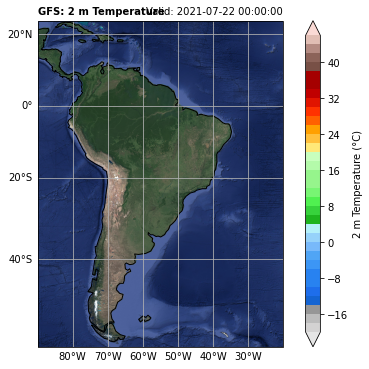

In [40]:
fig, ax =brazil_states()
# Plot the contours
img1 = plt.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
img2 = plt.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
plt.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()